# Pokemon Analysis Project

### Objectives:

1. Identify the pokemon that corresponds to the highest value of each stat.
2. Identify the number of pokemons per generation available in the data.
3. Identify the available types of each pokemon.
4. Identify the amount of pokemon from each respective primary type.
5. Identify the most common dual typing.
6. Get the total of each stat from each type.
7. Do a correlation analysis between each stat.

### Import Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
plt.style.use('ggplot')

In [89]:
plt.rcParams['figure.figsize'] = [8, 6]

### Load Data

In [7]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [8]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [9]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


Inititial Observation: The Pokemons are categorize according to their generation. All of the pokemons from each generation are listed alpabetically (base form) with their evolutions succeding each form.  

Example: Bulbasaur - Ivysaur - Venusaur -  	Mega Venusaur 	

### Get a summary of the raw data

In [12]:
np.round(df.describe(),2)

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00,800.00
mean,362.81,435.10,69.26,79.00,73.84,72.82,71.90,68.28,3.32
std,208.34,119.96,25.53,32.46,31.18,32.72,27.83,29.06,1.66
min,1.00,180.00,1.00,5.00,5.00,10.00,20.00,5.00,1.00
25%,184.75,330.00,50.00,55.00,50.00,49.75,50.00,45.00,2.00
50%,364.50,450.00,65.00,75.00,70.00,65.00,70.00,65.00,3.00
75%,539.25,515.00,80.00,100.00,90.00,95.00,90.00,90.00,5.00
max,721.00,780.00,255.00,190.00,230.00,194.00,230.00,180.00,6.00


The summary of the dataframe only shows the numerical data. Note that each individual stat maybe from a different pokemon than the other.

Let's identify the pokemon with the corresponding stat in the 'max' row

In [15]:
df.loc[df['Total'] == 780]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True


Observation: From this we identified that three pokemon share the same total stat of 780. They are Mega Mewtwo X, Mega Mewtwo Y, and Mega Rayquaza.

In [17]:
df.loc[df['HP'] == 255]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False


Observation: From this we identified that Blissey, a pokemon from generation 2 has the highest HP of 540. 

In [19]:
df.loc[df['Attack'] ==190]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


Observation: From this we identified that Mega Mewtwo X, a pokemon from generation 1 has the highest attack power  of 190. 

In [21]:
df.loc[df['Defense'] ==230]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
224,208,SteelixMega Steelix,Steel,Ground,610,75,125,230,55,95,30,2,False
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False
333,306,AggronMega Aggron,Steel,NaN,630,70,140,230,60,80,50,3,False


Observation: From this we identified that three pokemon share the same defense stat of 230. They are Mega Steelix, Shuckle, and Mega Aggron.

In [23]:
df.loc[df['Sp. Atk'] ==194]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True


Observation: From this we identified that Mega Mewtwo Y, a pokemon from generation 1 has the highest special attack power  of 194. 

In [25]:
df.loc[df['Sp. Def'] ==230]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
230,213,Shuckle,Bug,Rock,505,20,10,230,10,230,5,2,False


Observation: Shuckle is the only one with a special defense stat of 230.

In [27]:
df.loc[df['Speed'] ==180]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
431,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True


Observation: From this we identified that the 'speed form Deoxys' is the fastest pokemon.

### Let us identify the number of pokemon per generation

In [30]:
df['Generation'].value_counts()

Generation
1    166
5    165
3    160
4    121
2    106
6     82
Name: count, dtype: int64

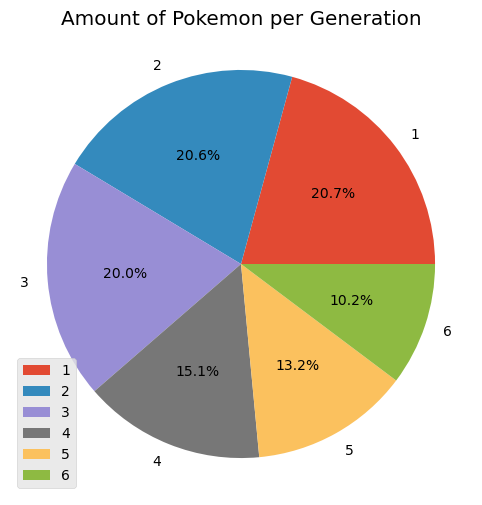

In [91]:
#The number of pokemon per generation
y = list(df['Generation'].value_counts())
#The number of generations recorded in the data
x = list(df['Generation'].unique())


myexplode = [0.2, 0, 0, 0, 0, 0]

fig, ax = plt.subplots()
ax.pie(y, labels=x, autopct='%1.1f%%', radius = 1.05)

#plt.pie(y, labels=x, explode=myexplode)
plt.title("Amount of Pokemon per Generation")
plt.legend(loc='lower left')
plt.show()

Observation: We can see that first gen released the most amount of pokemons and the sixth generation has the least. 

### Let's now identify the various types availabale for each pokemon.

In [34]:
vc = df['Type 1'].value_counts() #Will serve as the Y-value
print(vc)

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


<BarContainer object of 18 artists>

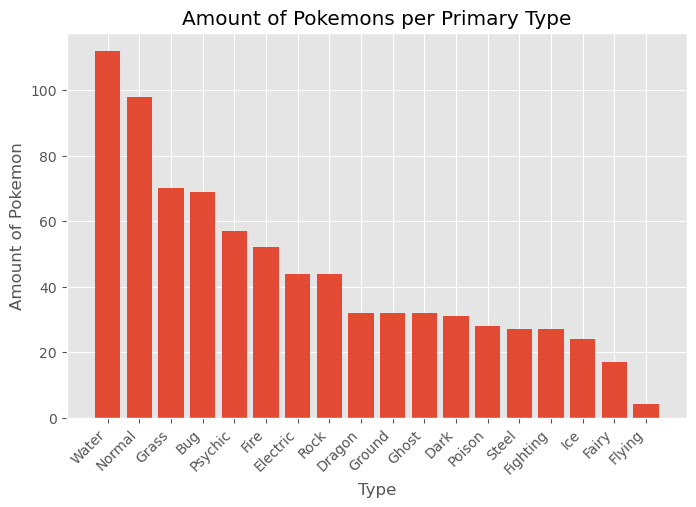

In [93]:
Types = np.array(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying'])
plt.figure(figsize=(8,5))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title("Amount of Pokemons per Primary Type")
plt.ylabel("Amount of Pokemon")
plt.xlabel('Type')
plt.bar(Types, vc)

We can see that the most common typing is 'Water'. The least common typing is 'Flying'.

### Now let us know the most common dual typing

In [38]:
Types = np.array(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying'])

In [99]:
for i in range(153): #You can make 153 combinatins dual types from the 18 different pokemon types
    a = np.random.randint(0,18)
    b = np.random.randint(0,18)
    print(f"Combination: {i+1}")
    print(Types[a], Types[b])
    print(df.loc[(df['Type 1'] == Types[a]) & (df['Type 2'] == Types[b])])
    #print(df.loc[(df['Type 1'] == Types[a]) & (df['Type 2'] == Types[b])].count())

Combination: 1
Poison Flying
       #    Name  Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  \
46    41   Zubat  Poison  Flying    245  40      45       35       30   
47    42  Golbat  Poison  Flying    455  75      80       70       65   
183  169  Crobat  Poison  Flying    535  85      90       80       70   

     Sp. Def  Speed  Generation  Legendary  
46        40     55           1      False  
47        75     90           1      False  
183       80    130           2      False  
Combination: 2
Fire Ground
       #                   Name Type 1  Type 2  Total  HP  Attack  Defense  \
352  322                  Numel   Fire  Ground    305  60      60       40   
353  323               Camerupt   Fire  Ground    460  70     100       70   
354  323  CameruptMega Camerupt   Fire  Ground    560  70     120      100   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
352       65       45     35           3      False  
353      105       75     40           3      Fals

In [126]:
print(df.loc[(df['Type 1'] == 'Steel') & (df['Type 2'] == 'Psychic')])

       #                     Name Type 1   Type 2  Total   HP  Attack  \
410  374                   Beldum  Steel  Psychic    300   40      55   
411  375                   Metang  Steel  Psychic    420   60      75   
412  376                Metagross  Steel  Psychic    600   80     135   
413  376  MetagrossMega Metagross  Steel  Psychic    700   80     145   
427  385                  Jirachi  Steel  Psychic    600  100     100   
484  436                  Bronzor  Steel  Psychic    300   57      24   
485  437                 Bronzong  Steel  Psychic    500   67      89   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
410       80       35       60     30           3      False  
411      100       55       80     50           3      False  
412      130       95       90     70           3      False  
413      150      105      110    110           3      False  
427      100      100      100    100           3       True  
484       86       24       86     23

In [128]:
print(df.loc[(df['Type 1'] == 'Bug') & (df['Type 2'] == 'Steel')])

       #                 Name Type 1 Type 2  Total  HP  Attack  Defense  \
220  205           Forretress    Bug  Steel    465  75      90      140   
228  212               Scizor    Bug  Steel    500  70     130      100   
229  212    ScizorMega Scizor    Bug  Steel    600  70     150      140   
460  413  WormadamTrash Cloak    Bug  Steel    424  60      69       95   
650  589           Escavalier    Bug  Steel    495  70     135      105   
693  632               Durant    Bug  Steel    484  58     109      112   
717  649             Genesect    Bug  Steel    600  71     120       95   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
220       60       60     40           2      False  
228       55       80     65           2      False  
229       65      100     75           2      False  
460       69       95     36           4      False  
650       60      105     20           5      False  
693       48       48    109           5      False  
717      120       95

Observation: From this iteration it is identified that the type combination with the most released pokemon are 'Steel-Psychic' and 'Bug-Steel'

In [132]:
df.loc[df['Type 1']=='Steel']['HP'].sum()

1761

In [240]:
Types = np.array(['Water', 'Normal', 'Grass', 'Bug', 'Psychic', 'Fire', 'Electric', 'Rock', 'Dragon', 'Ground', 'Ghost', 'Dark', 'Poison', 'Steel', 'Fighting', 'Ice', 'Fairy', 'Flying'])
Stats = np.array(['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'])

#To create a data frame
df_summary = pd.DataFrame(index=Types, columns=Stats)

#Iterate over the different types
def get_type(t:str):
    print(f"Type: {t}\n")

#Iterate over the different kind of stats category available
def get_stat_sum(t:str, s:str):
    Total_stat = df.loc[df['Type 1'] == t][s].sum()
    print(f"{s}: {Total_stat}\n")
    df_summary.loc[t, s] = Total_stat
    

for t in Types:
    get_type(t)
    for s in Stats:
        get_stat_sum(t, s)


    

Type: Water

HP: 8071

Attack: 8305

Defense: 8170

Sp. Atk: 8379

Sp. Def: 7898

Speed: 7388

Type: Normal

HP: 7573

Attack: 7200

Defense: 5865

Sp. Atk: 5470

Sp. Def: 6245

Speed: 7012

Type: Grass

HP: 4709

Attack: 5125

Defense: 4956

Sp. Atk: 5425

Sp. Def: 4930

Speed: 4335

Type: Bug

HP: 3925

Attack: 4897

Defense: 4880

Sp. Atk: 3717

Sp. Def: 4471

Speed: 4256

Type: Psychic

HP: 4026

Attack: 4073

Defense: 3858

Sp. Atk: 5609

Sp. Def: 4918

Speed: 4645

Type: Fire

HP: 3635

Attack: 4408

Defense: 3524

Sp. Atk: 4627

Sp. Def: 3755

Speed: 3871

Type: Electric

HP: 2631

Attack: 3040

Defense: 2917

Sp. Atk: 3961

Sp. Def: 3243

Speed: 3718

Type: Rock

HP: 2876

Attack: 4086

Defense: 4435

Sp. Atk: 2787

Sp. Def: 3321

Speed: 2460

Type: Dragon

HP: 2666

Attack: 3588

Defense: 2764

Sp. Atk: 3099

Sp. Def: 2843

Speed: 2657

Type: Ground

HP: 2361

Attack: 3064

Defense: 2715

Sp. Atk: 1807

Sp. Def: 2008

Speed: 2045

Type: Ghost

HP: 2062

Attack: 2361

Defense: 

### The summary of the total of each stat from the combined data from each pokemon per type

In [222]:
df_summary

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Water,8071,8305,8170,8379,7898,7388
Normal,7573,7200,5865,5470,6245,7012
Grass,4709,5125,4956,5425,4930,4335
Bug,3925,4897,4880,3717,4471,4256
Psychic,4026,4073,3858,5609,4918,4645
Fire,3635,4408,3524,4627,3755,3871
Electric,2631,3040,2917,3961,3243,3718
Rock,2876,4086,4435,2787,3321,2460
Dragon,2666,3588,2764,3099,2843,2657
Ground,2361,3064,2715,1807,2008,2045


### The correlation between each stat

In [228]:
correlation_matrix = df_summary.corr()
correlation_matrix

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.976846,0.934508,0.921639,0.973238,0.976334
Attack,0.976846,1.000000,0.966154,0.911319,0.967466,0.958153
Defense,0.934508,0.966154,1.000000,0.897740,0.959098,0.907931
Sp. Atk,0.921639,0.911319,0.897740,1.000000,0.971013,0.949328
Sp. Def,0.973238,0.967466,0.959098,0.971013,1.000000,0.976154
Speed,0.976334,0.958153,0.907931,0.949328,0.976154,1.000000


<Axes: >

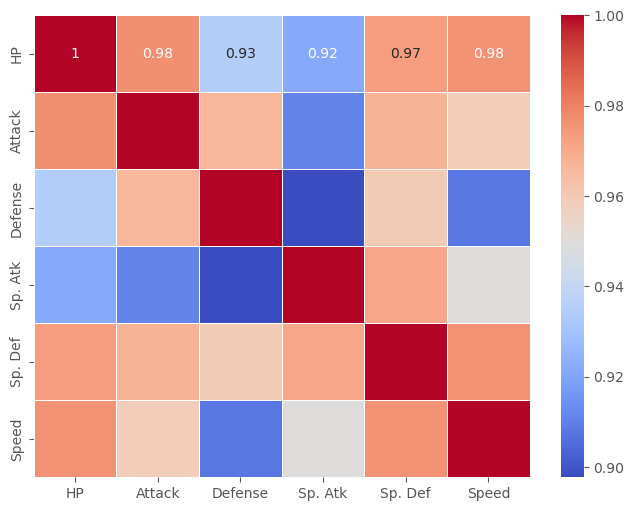

In [234]:
import seaborn as sns 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5)

Observation: Special Attack Power and Defense has the least amount of correlation

### Summary

1. 

    a. Mega Mewtwo X, Mega Mewtwo Y, and Mega Rayquaza have the highest total stats of 780.
    
    b. Blissey has the highest HP of 540.
    
    c. Mega Mewtwo X has the highest attack powe of 190.
    
    d. Mega Steelix, Shuckle, and Mega Aggron have the highest defense stat of 230.
    
    e. Mega Mewtwo Y as the highest special attack power  of 194. 
    
    f. Shuckle is the only one with a special defense stat of 230.
    
    g. Speed form Deoxys is the fastest pokemon with a speed of 180.

2. 
    Generation
    
    1    166
    
    5    165
    
    3    160
    
    4    121
    
    2    106
    
    6     82

3. Primary type and amount with this primary typing

    Water       112
    
    Normal       98
    
    Grass        70
    
    Bug          69
    
    Psychic      57
    
    Fire         52
    
    Electric     44
    
    Rock         44
    
    Dragon       32
    
    Ground       32
    
    Ghost        32
    
    Dark         31
    
    Poison       28
    
    Steel        27
    
    Fighting     27
    
    Ice          24
    
    Fairy        17
    
    Flying        4

4. 'Steel-Psychic' and 'Bug-Steel' are the most common dual typing from the iteration done. 


5. Water being the most common primary typing garnered the highest total of each stat from pokemons with 'water' as its primary typing.


6. Special Attack Power and Defense has the least amount of correlation.